In [12]:
#Baris ini mengimpor modul matplotlib.pyplot untuk visualisasi dan %matplotlib inline untuk mengatur plot agar ditampilkan di dalam notebook.
import matplotlib.pyplot as plt 
%matplotlib inline
#Baris ini mengimpor fungsi-fungsi yang diperlukan dari modul skimage untuk memanipulasi citra. data digunakan untuk mengambil citra bawaan, imread digunakan untuk membaca citra, dan rgb2gray digunakan untuk mengubah citra berwarna menjadi citra grayscale.
from skimage import data
from skimage.io import imread
from skimage.color import rgb2gray 
#Baris ini mengimpor modul numpy untuk operasi numerik pada array.
import numpy as np
import cv2

Shape citra 1 :  (366, 650)
Shape citra 1 :  (191, 263)


Text(0.5, 1.0, 'Citra 2')

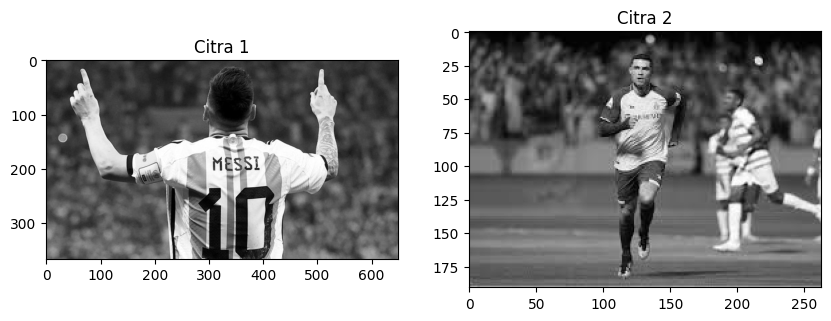

In [13]:
#Baris ini menggunakan fungsi imread dari modul skimage.io untuk membaca citra "messi.jpg" dan "ronaldo.jpg" dan menyimpannya ke dalam variabel citra1 dan citra2.
citra1 = imread(fname="messi.jpg")
citra1 = cv2.cvtColor(citra1,cv2.COLOR_RGB2GRAY)
citra2 = imread(fname="ronaldo.jpg")
citra2 = cv2.cvtColor(citra2,cv2.COLOR_RGB2GRAY)

#Baris ini mencetak dimensi (shape) citra pertama dan kedua dengan menggunakan atribut shape. Ini akan menampilkan tuple berisi tinggi, lebar, dan jumlah saluran citra.
print('Shape citra 1 : ', citra1.shape)
print('Shape citra 1 : ', citra2.shape)
#Baris ini membuat sebuah figure dan dua axes (subplots) dalam satu baris dengan ukuran total 10x10. Variabel ax kemudian menggabungkan kedua axes menjadi satu dimensi.
fig, axes = plt.subplots(1, 2, figsize=(10, 10))
ax = axes.ravel()
#Baris ini menampilkan citra pertama (citra1) di axes pertama (ax[0]) dengan menggunakan colormap 'gray' dan mengatur judul subplot menjadi "Citra 1". Kemudian, citra kedua (citra2) ditampilkan di axes kedua (ax[1]) dengan pengaturan yang serupa.
ax[0].imshow(citra1, cmap = 'gray')
ax[0].set_title("Citra 1")
ax[1].imshow(citra2, cmap = 'gray')
ax[1].set_title("Citra 2")

In [14]:
#%proses filter median untuk citra mobil
#for baris=2 : tinggiA-1
#    for kolom=2 : lebarA-1
#        dataA = [inputMobil(baris-1, kolom-1) inputMobil(baris-1, kolom) inputMobil(baris-1, kolom+1)  ...
#              inputMobil(baris, kolom-1) inputMobil(baris, kolom) inputMobil(baris, kolom+1)  ...
#              inputMobil(baris+1, kolom-1) inputMobil(baris+1, kolom) inputMobil(baris+1, kolom+1)];
#        % Urutkan
#        for i=1 : 8
#            for j=i+1 : 9
#                if dataA(i) > dataA(j)
#                    tmpA = dataA(i);
#                    dataA(i) = dataA(j);
#                    dataA(j) = tmpA;
#                end
#            end
#        end      
#        % Ambil nilai median
#        outputMobil(baris, kolom) = dataA(5);
#    end
#end

In [15]:
#Baris ini membuat salinan dari citra pertama dan kedua dengan menggunakan metode copy(). Salinan ini akan digunakan untuk memodifikasi citra tanpa mengubah citra asli.
copyCitra1 = citra1.copy()
copyCitra2 = citra2.copy()
#Baris ini mengambil dimensi (shape) citra pertama (copyCitra1) menggunakan atribut shape dan menyimpannya dalam variabel m1 dan n1. Selanjutnya, variabel output1 dibuat sebagai array kosong dengan ukuran yang sama dengan citra pertama.
m1,n1 = copyCitra1.shape
output1 = np.empty([m1, n1])
#Baris ini mengambil dimensi (shape) citra kedua (copyCitra2) menggunakan atribut shape dan menyimpannya dalam variabel m2 dan n2. Selanjutnya, variabel output2 dibuat sebagai array kosong dengan ukuran yang sama dengan citra kedua.
m2,n2 = copyCitra2.shape
output2 = np.empty([m2, n2])
#Baris ini mencetak dimensi (shape) citra pertama (copyCitra1) dan output1, serta nilai m1 dan n1.
print('Shape copy citra 1 : ', copyCitra1.shape)
print('Shape output citra 1 : ', output1.shape)
print('m1 : ',m1)
print('n1 : ',n1)
print()
#Baris ini mencetak dimensi (shape) citra kedua (copyCitra2) dan output2, serta nilai m2 dan n2.
print('Shape copy citra 2 : ', copyCitra2.shape)
print('Shape output citra 3 : ', output2.shape)
print('m2 : ',m2)
print('n2 : ',n2)
print()


Shape copy citra 1 :  (366, 650)
Shape output citra 1 :  (366, 650)
m1 :  366
n1 :  650

Shape copy citra 2 :  (191, 263)
Shape output citra 3 :  (191, 263)
m2 :  191
n2 :  263



In [16]:
#Baris ini menggunakan dua perulangan for untuk iterasi melalui setiap baris (baris) dan kolom (kolom) dalam citra pertama.
for baris in range(0, m1-1):
    for kolom in range(0, n1-1):
        #Baris ini menginisialisasi variabel a1 dan b1 dengan nilai baris dan kolom saat ini. Variabel ini digunakan untuk memperoleh nilai piksel sekitar dalam citra.
        a1 = baris
        b1 = kolom
        #Baris ini membuat daftar dataA yang berisi nilai piksel dari sekitar titik (a1, b1) dalam citra pertama. Nilai piksel disusun sesuai dengan urutan tertentu untuk diproses lebih lanjut.
        dataA = [copyCitra1[a1-1, b1-1], copyCitra1[a1-1, b1], copyCitra1[a1-1, b1+1], \
              copyCitra1[a1, b1-1], copyCitra1[a1, b1], copyCitra1[a1, b1+1], \
              copyCitra1[a1+1, b1-1], copyCitra1[a1+1, b1], copyCitra1[a1+1, b1+1]]
        
        #Baris ini mengurutkan nilai-nilai dalam dataA secara ascending menggunakan metode pengurutan gelembung (bubble sort). Hal ini dilakukan untuk memperoleh nilai median dari daftar tersebut.
        for i in range(1, 8):
            for j in range(i, 9):
                if dataA[i] > dataA[j]:
                    tmpA = dataA[i];
                    dataA[i] = dataA[j];
                    dataA[j]= tmpA;
        #Baris ini menyimpan nilai median dari dataA ke dalam output1 pada koordinat (a1, b1). Nilai median ini akan digunakan dalam pemrosesan selanjutnya.
        output1[a1, b1] = dataA[5]

In [17]:
#Baris ini menggunakan dua perulangan for untuk iterasi melalui setiap baris (baris) dan kolom (kolom) dalam citra kedua.
for baris in range(0, m2-1):
    for kolom in range(0, n2-1):
        #Baris ini menginisialisasi variabel a1 dan b1 dengan nilai baris dan kolom saat ini. Variabel ini digunakan untuk memperoleh nilai piksel sekitar dalam citra.
        a1 = baris
        b1 = kolom
        #Baris ini membuat daftar dataA yang berisi nilai piksel dari sekitar titik (a1, b1) dalam citra kedua. Nilai piksel disusun sesuai dengan urutan tertentu untuk diproses lebih lanjut.
        dataA = [copyCitra2[a1-1, b1-1], copyCitra2[a1-1, b1], copyCitra2[a1-1, b1+1], \
              copyCitra2[a1, b1-1], copyCitra2[a1, b1], copyCitra2[a1, b1+1], \
              copyCitra2[a1+1, b1-1], copyCitra2[a1+1, b1], copyCitra2[a1+1, b1+1]]
        
        #Baris ini mengurutkan nilai-nilai dalam dataA secara ascending menggunakan metode pengurutan gelembung (bubble sort). Hal ini dilakukan untuk memperoleh nilai median dari daftar tersebut.
        for i in range(1, 8):
            for j in range(i, 9):
                if dataA[i] > dataA[j]:
                    tmpA = dataA[i];
                    dataA[i] = dataA[j];
                    dataA[j]= tmpA;
        #Baris ini menyimpan nilai median dari dataA ke dalam output2 pada koordinat (a1, b1). Nilai median ini akan digunakan dalam pemrosesan selanjutnya.
        output2[a1, b1] = dataA[5]

Text(0.5, 1.0, 'Output Citra 2')

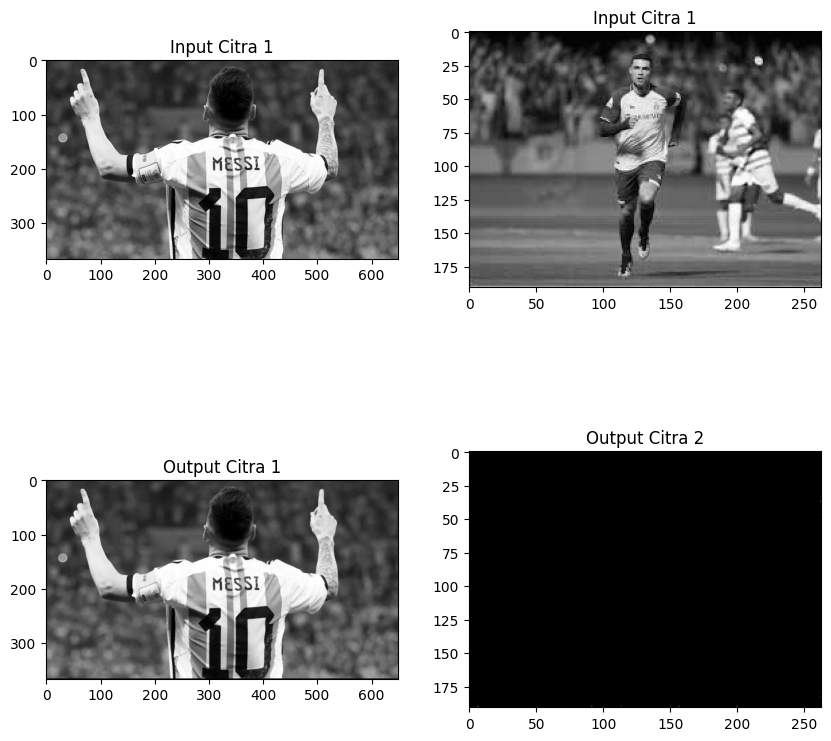

In [18]:
#Baris ini membuat subplot dengan ukuran 2x2 (4 subplot dalam total) dan mengatur ukuran figur menjadi 10x10. Variabel axes akan berisi array 2 dimensi yang berisi sumbu-sumbu (axes) dari setiap subplot. Variabel ax kemudian diatur dengan memperpendek dan meratakan array axes menjadi 1 dimensi.
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
ax = axes.ravel()
#Baris ini menampilkan citra pertama (citra1) pada subplot indeks 0 dan mengatur judul subplot menjadi "Input Citra 1".
ax[0].imshow(citra1, cmap = 'gray')
ax[0].set_title("Input Citra 1")
#Baris ini menampilkan citra kedua (citra2) pada subplot indeks 1 dan mengatur judul subplot menjadi "Input Citra 2".
ax[1].imshow(citra2, cmap = 'gray')
ax[1].set_title("Input Citra 1")
#Baris ini menampilkan output citra pertama (output1) pada subplot indeks 2 dan mengatur judul subplot menjadi "Output Citra 1".
ax[2].imshow(output1, cmap = 'gray')
ax[2].set_title("Output Citra 1")
#Baris ini menampilkan output citra kedua (output2) pada subplot indeks 3 dan mengatur judul subplot menjadi "Output Citra 2".
ax[3].imshow(output2, cmap = 'gray')
ax[3].set_title("Output Citra 2")